In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf


random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error as mse

In [3]:
import pandas as pd

csv_file_path = 'close.csv'

df = pd.read_csv(csv_file_path, header=None)

close = df[0].tolist()
logclose = np.log(close).tolist()




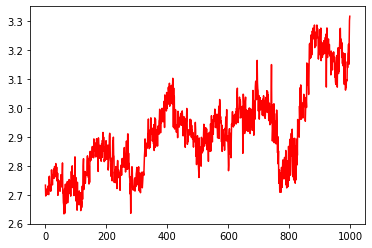

In [4]:
from math import floor

size = len(logclose)-100
close_train, close_test = close[0:size], close[size:len(close)]
logclose_train, logclose_test = logclose[0:size], logclose[size:len(logclose)]

series = logclose
train = logclose_train
test = logclose_test

plt.plot(series , color = 'r')
plt.show()


In [5]:
predicted_list, error_list = [], []
training_data = train

In [6]:
import pandas as pd

csv_file_path = 'forecasted_logclose_ARIMA_t.csv'

df = pd.read_csv(csv_file_path, header=None)

predicted_list = df[0].tolist()

print(predicted_list)

[3.2078, 3.2309, 3.2216, 3.2184, 3.2322, 3.2488, 3.2197, 3.2236, 3.225, 3.2207, 3.2055, 3.2057, 3.1991, 3.2092, 3.2124, 3.2205, 3.216, 3.207, 3.2075, 3.2181, 3.2284, 3.22, 3.2335, 3.1776, 3.1896, 3.2213, 3.2322, 3.2129, 3.218, 3.2145, 3.224, 3.2157, 3.2066, 3.2122, 3.2063, 3.1979, 3.1963, 3.1921, 3.1656, 3.1776, 3.1642, 3.1615, 3.1632, 3.1529, 3.167, 3.1653, 3.1692, 3.1789, 3.1755, 3.1748, 3.1758, 3.1524, 3.1435, 3.1263, 3.1114, 3.1261, 3.142, 3.1568, 3.1549, 3.1266, 3.1448, 3.1639, 3.1806, 3.1598, 3.1667, 3.1537, 3.1697, 3.1943, 3.2226, 3.2422, 3.2305, 3.2344, 3.2296, 3.2299, 3.2114, 3.2165, 3.1953, 3.195, 3.1785, 3.1701, 3.1662, 3.1457, 3.124, 3.1233, 3.1472, 3.125, 3.1036, 3.095, 3.0872, 3.0916, 3.0948, 3.0953, 3.1191, 3.1272, 3.1496, 3.1657, 3.1859, 3.1745, 3.1973, 3.2354]


In [7]:
for t in range(len(test)):
    predicted_value = predicted_list[t]
    obs = test[t]
    error_list.append(obs - predicted_value)
    training_data.append(obs)
    print('predicted=%f, expected=%f error=%f' % (predicted_value, obs,abs(predicted_value-obs)))

predicted=3.207800, expected=3.271051 error=0.063251
predicted=3.230900, expected=3.202381 error=0.028519
predicted=3.221600, expected=3.210279 error=0.011321
predicted=3.218400, expected=3.255555 error=0.037155
predicted=3.232200, expected=3.276956 error=0.044756
predicted=3.248800, expected=3.164039 error=0.084761
predicted=3.219700, expected=3.228549 error=0.008849
predicted=3.223600, expected=3.225494 error=0.001894
predicted=3.225000, expected=3.210561 error=0.014439
predicted=3.220700, expected=3.175467 error=0.045233
predicted=3.205500, expected=3.204006 error=0.001494
predicted=3.205700, expected=3.184657 error=0.021043
predicted=3.199100, expected=3.225573 error=0.026473
predicted=3.209200, expected=3.216152 error=0.006952
predicted=3.212400, expected=3.233173 error=0.020773
predicted=3.220500, expected=3.205588 error=0.014912
predicted=3.216000, expected=3.188375 error=0.027625
predicted=3.207000, expected=3.206196 error=0.000804
predicted=3.207500, expected=3.235340 error=0.

In [8]:
error = mse(test, predicted_list)
print('Test MSE: %.3f' % error)

Test MSE: 0.002


In [9]:
import pandas as pd

csv_file_path = 'rawResiduals_ARIMA_t.csv'

df = pd.read_csv(csv_file_path, header=None)

training_error = np.array(df[0].tolist())

print(training_error)


[-1.5298e-03 -3.9311e-02 -1.3006e-02 -1.1653e-02 -1.4471e-02  9.3608e-03
 -1.0644e-02  8.4813e-03 -1.2014e-02  1.8682e-02 -1.7034e-02 -1.3471e-02
  5.1304e-02  3.5291e-02 -6.6937e-03 -6.9816e-03 -2.5176e-02 -9.5337e-03
 -1.5330e-02 -5.5265e-03  6.3853e-02  1.3319e-02  1.2284e-02 -2.1874e-02
  1.4262e-02  1.3063e-02 -2.9134e-03  2.8957e-02 -3.0832e-03 -1.3177e-02
  3.1001e-02  4.7857e-04  1.7091e-02 -5.0127e-03  2.2891e-02 -3.2433e-02
 -1.0452e-02  1.5019e-02 -3.2515e-02 -2.8845e-02  8.1991e-03 -7.1981e-02
  6.5736e-03 -2.2886e-02  6.6396e-03  3.9180e-03 -4.4601e-03 -2.4622e-02
 -2.5696e-02  1.5648e-02  1.4045e-02  2.7832e-02 -1.5122e-02 -2.0188e-02
  2.1315e-02  1.9706e-02  5.3098e-02 -6.9798e-02 -4.5886e-02 -6.3934e-02
 -4.9847e-02 -6.5052e-02  3.5083e-02  3.1798e-02 -6.5338e-02  5.6268e-02
  3.6506e-02 -4.5097e-02  1.2009e-02 -1.0230e-02  3.6949e-02  2.0499e-02
  2.3158e-02 -5.9164e-02 -1.5642e-02  2.4846e-02 -1.4025e-02  1.8198e-02
  3.3714e-02 -1.3643e-02  2.1978e-02 -3.0665e-02  1

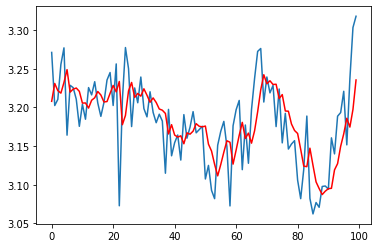

Test MSE: 0.001985


In [10]:
plt.plot(test)
plt.plot(predicted_list, color='red')
plt.show()

error = mse(test,predicted_list)
print('Test MSE: %.6f' % error)

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse


training_error = np.array(training_error).reshape(-1,1)

In [12]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
import warnings

warnings.filterwarnings("ignore")

def make_model(num_layers, neurons, activation, initializer, optimizer, dropout_rate, window_size):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    model = Sequential()
    model.add(Dense(neurons[0], input_dim=window_size, kernel_initializer=initializer, activation=activation))
    model.add(Dropout(dropout_rate))
    for i in range(1, num_layers):
        model.add(Dense(neurons[i], kernel_initializer=initializer, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

space = {
    "window_size": hp.choice("window_size", list(range(2, 20))), 
    "num_layers_choice": hp.choice("num_layers_choice", [
         { 
             "num_layers": 1,
             "neurons": hp.quniform("neurons_1", 2, 299, 1)
         }
    ]),
    "activation": hp.choice("activation", ["sigmoid", "tanh", "relu", "elu"]),
    "initializer": hp.choice("initializer", ["uniform", "glorot_uniform", "he_uniform"]),
    "optimizer": hp.choice("optimizer", ["adam", "sgd", "rmsprop"]),
    "dropout_rate": hp.uniform("dropout_rate", 0.0, 0.5),
    "batch_size": hp.quniform("batch_size", 8, 128, 1)
}


def objective(params):

    window_size = params["window_size"]

    scaler = StandardScaler()
    training_error_scaled = scaler.fit_transform(training_error)

    arch = params["num_layers_choice"]
    if arch["num_layers"] == 1:
        num_layers = 1
        neurons = [int(arch["neurons"])]
    if arch["num_layers"] == 2:
        num_layers = 2
        neurons = [int(arch["neurons1"]), int(arch["neurons2"])]
    if arch["num_layers"] == 3:
        num_layers = 3
        neurons = [int(arch["neurons1"]), int(arch["neurons2"]), int(arch["neurons3"])]
    
    
    activation = params["activation"]
    initializer = params["initializer"]
    optimizer_param = params["optimizer"]
    dropout_rate = params["dropout_rate"]
    batch_size = int(params["batch_size"])
    
    train_X, train_Y = [], []
    for i in range(len(training_error_scaled) - window_size):
        train_X.append(training_error_scaled[i:i+window_size])
        train_Y.append(training_error_scaled[i+window_size])
    new_train_X = np.array([x.reshape(-1) for x in train_X])
    new_train_Y = np.array(train_Y).ravel()
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
    epochs = 2000
    validation_split = 0.10
    
    modelKeras = KerasRegressor(
        model=make_model,
        window_size=window_size,
        model__num_layers=num_layers,
        model__neurons=neurons,
        model__activation=activation,
        model__initializer=initializer,
        model__optimizer=optimizer_param,
        model__dropout_rate=dropout_rate,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=validation_split,
        callbacks=callbacks,
        shuffle=False, 
        random_state=42,    
        verbose=0
    )
    
    tscv = TimeSeriesSplit(n_splits=2)
    score = np.mean(cross_val_score(modelKeras, new_train_X, new_train_Y, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1))

    
    print(f"Params: {params}, Score: {score:.4f}")

    return {"loss": -score, "status": STATUS_OK}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials,
            rstate=np.random.default_rng(42))

best_loss = trials.best_trial['result']['loss']
best_score = best_loss

print("\n------------------------")
print("BEST OVERALL RESULTS:")
print("------------------------")
print("Raw best parameters (indices/values):")
print(best)
print(f"Best score: {best_score:.4f}")

Params: {'activation': 'elu', 'batch_size': 100.0, 'dropout_rate': 0.32587119987444696, 'initializer': 'glorot_uniform', 'num_layers_choice': {'neurons': 186.0, 'num_layers': 1}, 'optimizer': 'rmsprop', 'window_size': 2}, Score: -1.1203
Params: {'activation': 'elu', 'batch_size': 76.0, 'dropout_rate': 0.029968094540700263, 'initializer': 'he_uniform', 'num_layers_choice': {'neurons': 183.0, 'num_layers': 1}, 'optimizer': 'adam', 'window_size': 17}, Score: -1.3404
Params: {'activation': 'relu', 'batch_size': 77.0, 'dropout_rate': 0.07858985028094856, 'initializer': 'uniform', 'num_layers_choice': {'neurons': 24.0, 'num_layers': 1}, 'optimizer': 'adam', 'window_size': 4}, Score: -1.1259
Params: {'activation': 'relu', 'batch_size': 17.0, 'dropout_rate': 0.35223000813752336, 'initializer': 'glorot_uniform', 'num_layers_choice': {'neurons': 65.0, 'num_layers': 1}, 'optimizer': 'sgd', 'window_size': 13}, Score: -1.1880
Params: {'activation': 'tanh', 'batch_size': 49.0, 'dropout_rate': 0.1730

In [13]:
window_sizes = list(range(2, 20))
activations_list = ["sigmoid", "tanh", "relu", "elu"]
initializers_list = ["uniform", "glorot_uniform", "he_uniform"]
optimizers_list = ["adam", "sgd", "rmsprop"]

best_window_size = window_sizes[ best["window_size"] ]
best_activation = activations_list[ best["activation"] ]
best_initializer = initializers_list[ best["initializer"] ]
best_optimizer = optimizers_list[ best["optimizer"] ]
best_dropout_rate = best["dropout_rate"]
best_batch_size = int(best["batch_size"])


if best["num_layers_choice"] == 0:
    best_num_layers = 1
    best_neurons = [int(best["neurons_1"])]
if best["num_layers_choice"] == 1:
    best_num_layers = 2
    best_neurons = [int(best["neurons_2_1"]), int(best["neurons_2_2"])]
if best["num_layers_choice"] == 2:
    best_num_layers = 3
    best_neurons = [int(best["neurons_3_1"]), int(best["neurons_3_2"]), int(best["neurons_3_3"])]


scaler = StandardScaler()
training_error_scaled = scaler.fit_transform(training_error)

train_X, train_Y = [], []
for i in range(0, len(training_error_scaled) - best_window_size):
    train_X.append(training_error_scaled[i:i+best_window_size])
    train_Y.append(training_error_scaled[i+best_window_size])
new_train_X = np.array([x.reshape(-1) for x in train_X])
new_train_Y = np.array(train_Y).ravel()


final_model = make_model(
    num_layers=best_num_layers,
    neurons=best_neurons,
    activation=best_activation,
    initializer=best_initializer,
    optimizer=best_optimizer,
    dropout_rate=best_dropout_rate,
    window_size=best_window_size
)

final_model.fit(new_train_X, new_train_Y,
                batch_size=best_batch_size,
                epochs=2000,
                validation_split=0.10,
                callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
                shuffle=False,  
                verbose=1)

Epoch 1/2000
24/24 [==============================] - 0s 4ms/step - loss: 2.0673 - val_loss: 2.3232
Epoch 2/2000
24/24 [==============================] - 0s 2ms/step - loss: 1.7112 - val_loss: 2.1356
Epoch 3/2000
24/24 [==============================] - 0s 2ms/step - loss: 1.7554 - val_loss: 1.9870
Epoch 4/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.5810 - val_loss: 1.8745
Epoch 5/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.4166 - val_loss: 1.7817
Epoch 6/2000
24/24 [==============================] - 0s 2ms/step - loss: 1.3004 - val_loss: 1.7145
Epoch 7/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.3101 - val_loss: 1.6536
Epoch 8/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.2157 - val_loss: 1.6116
Epoch 9/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.2052 - val_loss: 1.5756
Epoch 10/2000
24/24 [==============================] - 0s 880us/step - loss: 1.1435 - val_loss: 1.55

In [14]:
print(best_window_size)
print(best_activation)
print(best_initializer)
print(best_optimizer)
print(best_dropout_rate)
print(best_batch_size) 
print(best_neurons) 

2
elu
glorot_uniform
adam
0.27401416198408
34
[7]


In [15]:
window_size = best_window_size
model = final_model

29/29 [==============================] - 0s 669us/step


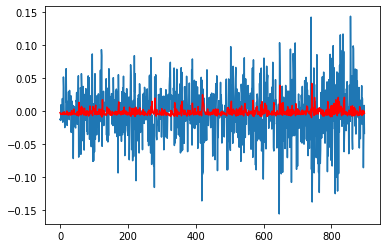

Train MSE: 0.001674


In [16]:
predictions = model.predict(new_train_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))
Y = pd.DataFrame(training_error[window_size:])
pred = pd.DataFrame(predictions_rescaled)
plt.plot(Y, label='ARIMA Residuals')
plt.plot(pred , color = 'r', label='ML Predictions')
plt.show()
error = mse(training_error[window_size:],predictions_rescaled)
print('Train MSE: %.6f' % error)

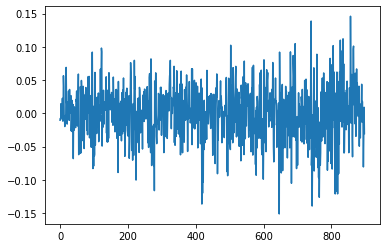

In [17]:
rawResiduals_ARIMA_t_FNN = Y - pred
plt.plot(rawResiduals_ARIMA_t_FNN)
plt.show()

rawResiduals_ARIMA_t_FNN.to_csv('rawResiduals_ARIMA_t_FNN_BO-TPE_standardscaler.csv', index=False)

4/4 [==============================] - 0s 1ms/step


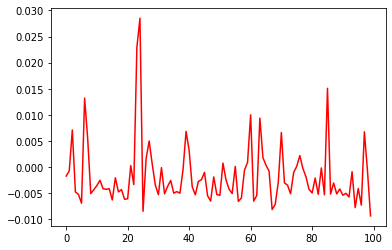

Test MSE: 0.001957


In [18]:
test_extended = training_error.tolist()[-1*window_size:] + error_list
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
        

test_data = np.array(test_data).reshape(-1,1)
test_scaled = scaler.transform(test_data)

test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)


predictions = model.predict(new_test_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))


Y = pd.DataFrame(error_list)
pred = pd.DataFrame(predictions_rescaled)

plt.plot(predictions_rescaled , color = 'r')
plt.show()
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

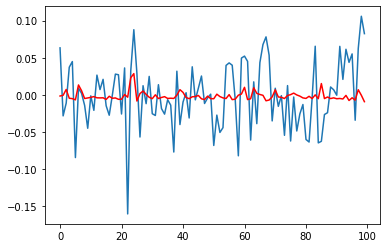

Test MSE: 0.001957


In [19]:
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.show()
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

Hybrid Test MSE: 0.001957


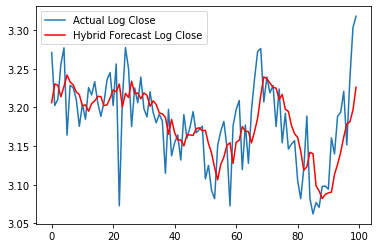

In [20]:
predicted_array = np.array(predicted_list)
final_pred = predicted_array+predictions_rescaled.flatten()
hybrid_error = mse(np.array(test), final_pred)
print('Hybrid Test MSE: %.6f' % hybrid_error)

plt.plot(pd.DataFrame(test), label="Actual Log Close")
plt.plot(pd.DataFrame(final_pred), color='r', label="Hybrid Forecast Log Close")
plt.legend()
plt.show()

In [21]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on logclose: ")
print(compute_error_metrics(test, final_pred))
print(compute_directional_metrics(test, final_pred))


Errors on logclose: 
{'NMSE': 0.6376638557259339, 'MAE': 0.034792444527482196, 'RMSE': 0.04424015297892114, 'MSE': 0.0019571911355983455, 'MAPE': 1.0947169882868037, 'TheilsU': 0.8757647810524969}
{'DA': 0.6464646464646465, 'DS': 0.41414141414141414, 'CU': 0.4, 'CD': 0.4318181818181818}


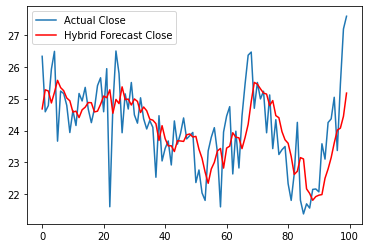

Test MSE: 1.136710


In [22]:
close_pred = np.exp(final_pred)
Y = pd.DataFrame(close_test)
pred = pd.DataFrame(close_pred)
plt.plot(Y, label="Actual Close")
plt.plot(pred , color = 'r', label="Hybrid Forecast Close")
plt.legend()
plt.show()

error = mse(close_test,close_pred)
print('Test MSE: %.6f' % error)

In [23]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on close: ")
print(compute_error_metrics(close_test, close_pred))
print(compute_directional_metrics(close_test, close_pred))

Errors on close: 
{'NMSE': 0.6422490435970091, 'MAE': 0.8375153911749541, 'RMSE': 1.0661659558093095, 'MSE': 1.1367098453267785, 'MAPE': 3.4820397646364345, 'TheilsU': 0.8709054624447389}
{'DA': 0.6464646464646465, 'DS': 0.41414141414141414, 'CU': 0.4, 'CD': 0.4318181818181818}


Stock: 26.339 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 26339.0
Stock: 24.591 Action: Buy Portfolio: 26336.96 Stocks: 1071 Balance_init: 2 total($) 26338.96
Stock: 24.786 Action: Bought--Holding Portfolio: 26545.81 Stocks: 1071 Balance_init: 2 total($) 26547.81
Stock: 25.934 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 27777.31
Stock: 26.495 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 27777.31
Stock: 23.666 Action: Buy Portfolio: 27760.22 Stocks: 1173 Balance_init: 17 total($) 27777.22
Stock: 25.243 Action: Bought--Holding Portfolio: 29610.04 Stocks: 1173 Balance_init: 17 total($) 29627.04
Stock: 25.166 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29536.72
Stock: 24.793 Action: Buy Portfolio: 29528.46 Stocks: 1191 Balance_init: 8 total($) 29536.46
Stock: 23.938 Action: Bought--Holding Portfolio: 28510.16 Stocks: 1191 Balance_init: 8 total($) 28518.16
Stock: 24.631 Act

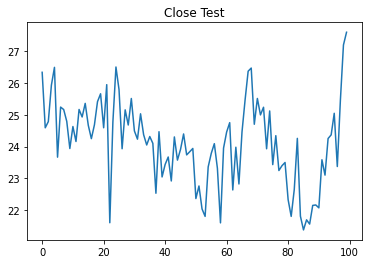

Final value of stock:
27601.0


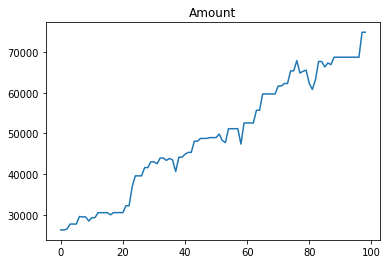

Final value of portfolio:
74831.0
TS=
2.7111698851490886


In [ ]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from trading_strategies import trading_strategy1

trading_strategy1(close_test, close_pred)
            

In [25]:
74831.0/(1000*27.601)

2.7111698851490886